In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
import numpy as np
import math
from pprint import pprint
sns.set()

In [2]:
parasweep = pd.read_csv("fox_rabbit3D_multipara.csv")

In [3]:
parasweep["number_of_trajectories"].max()

7

In [4]:
parasweep["Timespan"].max()

40

In [5]:
# Maximum Combination Dataset
paramax = parasweep[parasweep["Timespan"] == 40]
paramax = paramax[paramax["number_of_trajectories"] == 7]
paramax

,runtime,The number of rabbits,The number of foxes,r_birth,f_birth,f_death,number_of_trajectories,Timespan
405000,2.645468,1.549714e+03,613.000000,5.0,0.005,5.000000,7,40
405001,2.681803,1.689143e+03,513.714286,5.0,0.005,6.666667,7,40
405002,2.602450,5.351429e+02,714.000000,5.0,0.005,8.333333,7,40
405003,20.024963,9.475408e+06,0.000000,5.0,0.005,10.000000,7,40
405004,2.578358,8.825714e+02,1057.142857,5.0,0.005,11.666667,7,40
...,...,...,...,...,...,...,...,...
431995,2.411189,1.102857e+03,893.142857,100.0,0.100,84.210526,7,40
431996,2.469272,3.614286e+02,1532.571429,100.0,0.100,88.157895,7,40
431997,2.330160,6.644286e+02,805.428571,100.0,0.100,92.105263,7,40
431998,20.024446,1.067954e+07,53.285714,100.0,0.100,96.052632,7,40


In [6]:
paramax["runtime"].mean()

9.362168201208114

In [7]:
paramax_groups = paramax.groupby(['r_birth','f_birth','f_death'])
paramax_groups.agg({"runtime":"count"}).rename(columns={"runtime":"number of groups"})

number of groups
r_birth f_birth f_death                     
5.0     0.005   5.000000                   2
                5.789474                   1
                6.578947                   1
                6.666667                   1
                7.368421                   1
...                                      ...
100.0   0.100   88.157895                  1
                91.666667                  1
                92.105263                  1
                96.052632                  1
                100.000000                 2

[26960 rows x 1 columns]

In [8]:
para_index = np.arange(len(paramax_groups))
para_index

array([    0,     1,     2, ..., 26957, 26958, 26959])

In [9]:
para_ml = pd.DataFrame(columns = ['r_birth','f_birth','f_death','runtime_normalized'], index = para_index)
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
26955,NaN,NaN,NaN,NaN
26956,NaN,NaN,NaN,NaN
26957,NaN,NaN,NaN,NaN
26958,NaN,NaN,NaN,NaN


In [10]:
# Normalization of runtime
i = 0
for k,v in paramax_groups:
    para_ml.loc[i, "r_birth"] = k[0]
    para_ml.loc[i, "f_birth"] = k[1]
    para_ml.loc[i, "f_death"] = k[2]
    group = paramax_groups.get_group(k)
    group = group.copy()
    
    if (group["runtime"] >= 20).any():
        para_ml.loc[i, "runtime_normalized"] = np.inf
    else:
        group['runtime_normalized'] = group["runtime"]/(group['Timespan'] * group['number_of_trajectories'])
        para_ml.loc[i, "runtime_normalized"] = group["runtime_normalized"].mean()
        
    i = i+1

In [11]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized
0,5.0,0.005,5.0,inf
1,5.0,0.005,5.789474,inf
2,5.0,0.005,6.578947,0.009693
3,5.0,0.005,6.666667,0.009578
4,5.0,0.005,7.368421,inf
...,...,...,...,...
26955,100.0,0.1,88.157895,0.008819
26956,100.0,0.1,91.666667,0.009705
26957,100.0,0.1,92.105263,0.008322
26958,100.0,0.1,96.052632,inf


In [12]:
para_ml[para_ml["runtime_normalized"] == np.inf]

,r_birth,f_birth,f_death,runtime_normalized
0,5.0,0.005,5.0,inf
1,5.0,0.005,5.789474,inf
4,5.0,0.005,7.368421,inf
9,5.0,0.005,10.0,inf
10,5.0,0.005,10.526316,inf
...,...,...,...,...
26949,100.0,0.1,72.368421,inf
26950,100.0,0.1,75.0,inf
26953,100.0,0.1,83.333333,inf
26958,100.0,0.1,96.052632,inf


In [13]:
# Normalization of model parameters
para_ml["r_birth_normalized"] = (para_ml["r_birth"]-para_ml["r_birth"].min())/(para_ml["r_birth"].max()-para_ml["r_birth"].min())
para_ml["f_birth_normalized"] = (para_ml["f_birth"]-para_ml["f_birth"].min())/(para_ml["f_birth"].max()-para_ml["f_birth"].min())
para_ml["f_death_normalized"] = (para_ml["f_death"]-para_ml["f_death"].min())/(para_ml["f_death"].max()-para_ml["f_death"].min())

In [14]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized
0,5.0,0.005,5.0,inf,0.0,0.0,0.0
1,5.0,0.005,5.789474,inf,0.0,0.0,0.00831
2,5.0,0.005,6.578947,0.009693,0.0,0.0,0.01662
3,5.0,0.005,6.666667,0.009578,0.0,0.0,0.017544
4,5.0,0.005,7.368421,inf,0.0,0.0,0.024931
...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.008819,1.0,1.0,0.875346
26956,100.0,0.1,91.666667,0.009705,1.0,1.0,0.912281
26957,100.0,0.1,92.105263,0.008322,1.0,1.0,0.916898
26958,100.0,0.1,96.052632,inf,1.0,1.0,0.958449


In [15]:
# Features for machine learning
X = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])
Y = para_ml["runtime_normalized"]

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
sns.set()

In [17]:
Y = Y.replace(np.inf, 99999)

In [18]:
Y

0        99999.000000
1        99999.000000
2            0.009693
3            0.009578
4        99999.000000
             ...     
26955        0.008819
26956        0.009705
26957        0.008322
26958    99999.000000
26959    99999.000000
Name: runtime_normalized, Length: 26960, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [20]:
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [21]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [22]:
y_pred = knn.predict(X_test)
y_test.reset_index(drop=True, inplace=True)

In [23]:
y_pred

array([39999.60547783, 79999.20181939, 19999.80735758, ...,
       39999.60544728, 19999.80713433, 19999.80755751])

In [24]:
for i,y in enumerate(y_pred):
    y_pred[i] = y*40*7
    if y_pred[i] > 20:
        y_pred[i] = 20

In [25]:
y_pred

array([20., 20., 20., ..., 20., 20., 20.])

In [26]:
y_test = list(y_test)
for i,y in enumerate(y_test):
    if y == 99999:
        y_test[i] = 20
    else:
        y_test[i] = y*40*7

In [27]:
y_test

[20,
 2.473924160003662,
 20,
 20,
 20,
 2.672881841659546,
 2.7941343784332275,
 2.474402904510498,
 20,
 2.491644620895386,
 2.6878139972686768,
 2.678287506103516,
 2.8288726806640625,
 2.487727165222168,
 2.690338134765625,
 2.3729166984558105,
 2.336141347885132,
 20,
 2.498379707336426,
 20,
 2.549729108810425,
 2.4756109714508057,
 2.348885297775269,
 2.520333766937256,
 2.526628971099853,
 20,
 20,
 2.5669593811035156,
 7.4017229080200195,
 2.4400906562805176,
 2.4616372585296635,
 20,
 2.6299145221710205,
 2.484764575958252,
 2.6464602947235107,
 2.4820809364318848,
 2.6337780952453613,
 2.5204498767852783,
 2.657874822616577,
 2.482466459274292,
 20,
 2.568677425384521,
 2.2837114334106445,
 20,
 2.5516278743743896,
 20,
 20,
 2.5408201217651367,
 2.5218005180358887,
 20,
 2.491657257080078,
 2.393905401229859,
 2.4432270526885986,
 20,
 20,
 2.629472255706787,
 2.4870688915252694,
 2.2822353839874268,
 2.70023512840271,
 2.3664717674255367,
 20,
 2.627087116241455,
 20,
 2.5

In [28]:
from sklearn.metrics import mean_squared_error
RMSE = round(mean_squared_error(y_test, y_pred, squared=False),6) 

In [29]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test,y_pred),6)

Text(0.5, 1.0, 'MAE:10.387601, RMSE:13.450766')

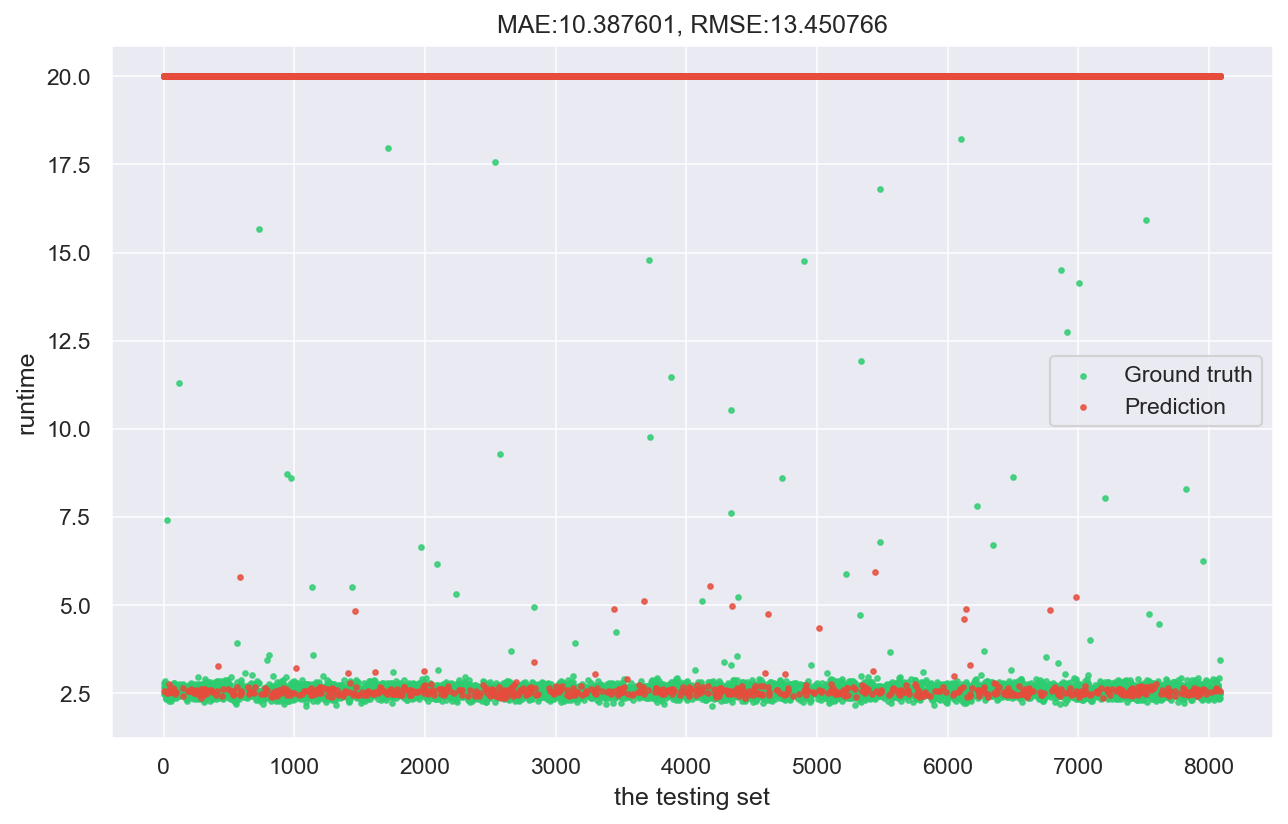

In [30]:
# Comparison between the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(np.arange(len(y_test)), y_test, s=5, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.scatter(np.arange(len(y_test)), y_pred, s=5, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('the testing set')
ax.set_title(f'MAE:{MAE}, RMSE:{RMSE}')

Text(0.5, 0, 'runtime')

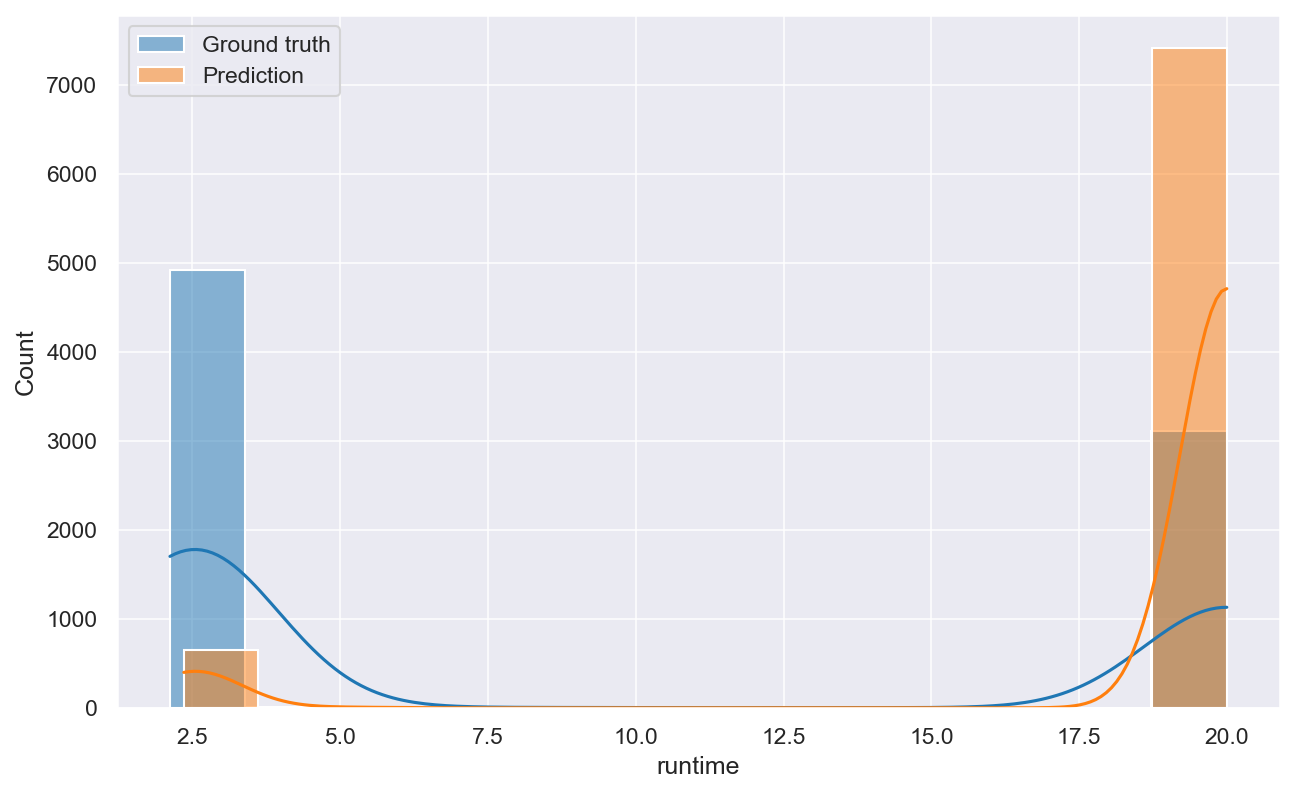

In [31]:
# The distributions of the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
sns.histplot(x=y_test,kde=True,label='Ground truth',color = "#1f77b4")
sns.histplot(x=y_pred,kde=True,label='Prediction',color = "#ff7f0e")
ax.legend()
ax.set_xlabel('runtime')

In [32]:
# To avoid the impact of the linear scaling, the runtime is not normalized in this part.
Xn = pd.DataFrame(para_ml,columns = ["r_birth_normalized", "f_birth_normalized","f_death_normalized"])

i = 0
for k,v in paramax_groups:
    group = paramax_groups.get_group(k)
    group = group.copy()
    
    if (group["runtime"] >= 20).any():
        para_ml.loc[i, "runtime"] = np.inf
    else:
        para_ml.loc[i, "runtime"] = group["runtime"].mean()
        
    i = i+1

In [33]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized,runtime
0,5.0,0.005,5.0,inf,0.0,0.0,0.0,inf
1,5.0,0.005,5.789474,inf,0.0,0.0,0.00831,inf
2,5.0,0.005,6.578947,0.009693,0.0,0.0,0.01662,2.714154
3,5.0,0.005,6.666667,0.009578,0.0,0.0,0.017544,2.681803
4,5.0,0.005,7.368421,inf,0.0,0.0,0.024931,inf
...,...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.008819,1.0,1.0,0.875346,2.469272
26956,100.0,0.1,91.666667,0.009705,1.0,1.0,0.912281,2.717501
26957,100.0,0.1,92.105263,0.008322,1.0,1.0,0.916898,2.330160
26958,100.0,0.1,96.052632,inf,1.0,1.0,0.958449,inf


In [34]:
Yn = para_ml["runtime"]
Yn = Yn.replace(np.inf, 99999)
X_train,X_test,y_train,y_test = train_test_split(Xn,Yn,test_size=0.3,random_state = 0)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
y_pred_reg = knn_reg.predict(X_test)
for i,y in enumerate(y_pred_reg):
    if y_pred_reg[i] > 20:
        y_pred_reg[i] = 20
y_test = list(y_test)
for i,y in enumerate(y_test):
    if y == 99999:
        y_test[i] = 20

In [35]:
y_pred_reg

array([20., 20., 20., ..., 20., 20., 20.])

In [36]:
len(y_pred_reg)

8088

In [37]:
i = 0
for i,y in enumerate(y_pred_reg):
    if (y_pred_reg[i] == y_pred[i]):
        i += 1

In [38]:
i

8088

In [39]:
from sklearn.metrics import mean_squared_error
RMSE = round(mean_squared_error(y_test, y_pred_reg, squared=False),6) 

In [40]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test,y_pred_reg),6)

Text(0.5, 1.0, 'MAE:10.387601, RMSE:13.450766')

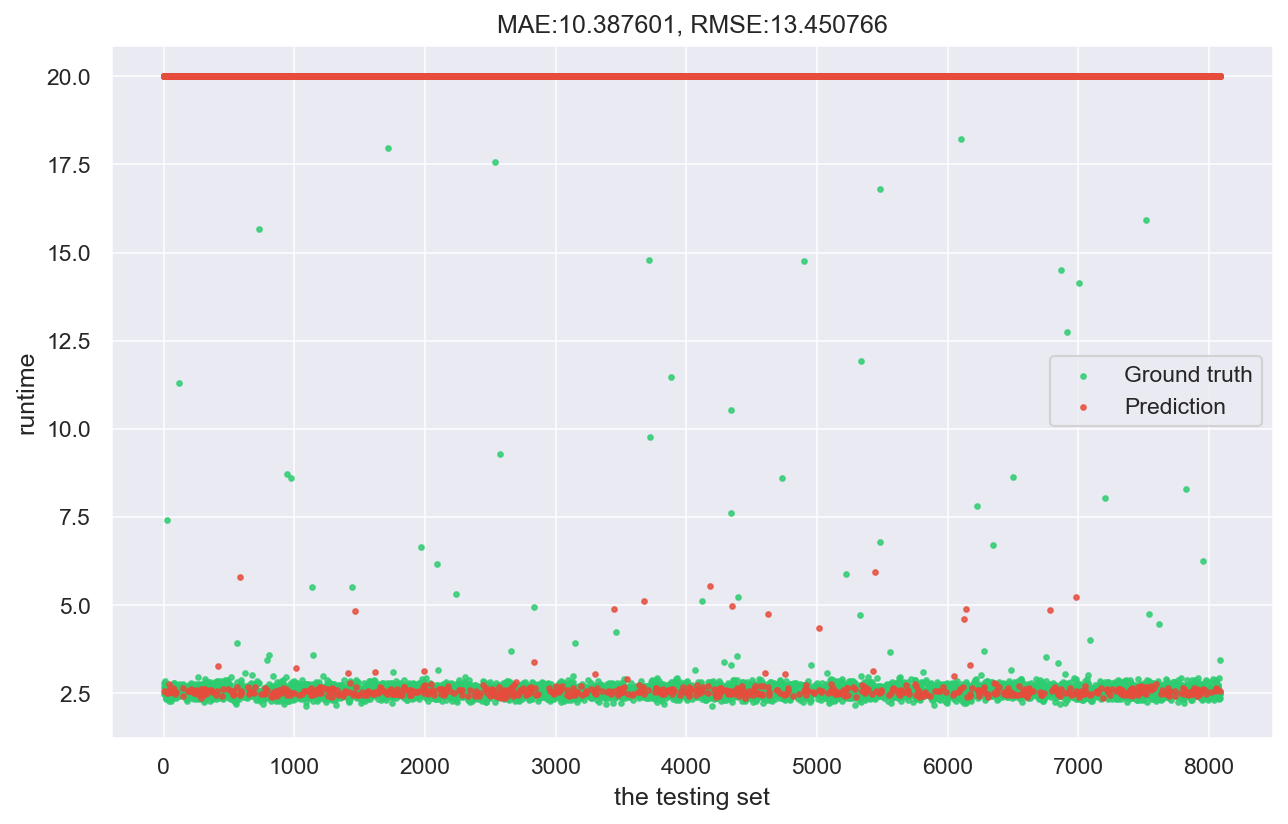

In [41]:
# Comparison between the predicted and actual running times
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(alpha=0.75)
ax.scatter(np.arange(len(y_test)), y_test, s=5, color='#2ecc71', alpha=0.8, label='Ground truth')
ax.scatter(np.arange(len(y_test)), y_pred_reg, s=5, color='#e74c3c', alpha=0.8, label='Prediction')
ax.legend()
ax.set_ylabel('runtime')
ax.set_xlabel('the testing set')
ax.set_title(f'MAE:{MAE}, RMSE:{RMSE}')

In [42]:
para_ml

,r_birth,f_birth,f_death,runtime_normalized,r_birth_normalized,f_birth_normalized,f_death_normalized,runtime
0,5.0,0.005,5.0,inf,0.0,0.0,0.0,inf
1,5.0,0.005,5.789474,inf,0.0,0.0,0.00831,inf
2,5.0,0.005,6.578947,0.009693,0.0,0.0,0.01662,2.714154
3,5.0,0.005,6.666667,0.009578,0.0,0.0,0.017544,2.681803
4,5.0,0.005,7.368421,inf,0.0,0.0,0.024931,inf
...,...,...,...,...,...,...,...,...
26955,100.0,0.1,88.157895,0.008819,1.0,1.0,0.875346,2.469272
26956,100.0,0.1,91.666667,0.009705,1.0,1.0,0.912281,2.717501
26957,100.0,0.1,92.105263,0.008322,1.0,1.0,0.916898,2.330160
26958,100.0,0.1,96.052632,inf,1.0,1.0,0.958449,inf


In [43]:
# The performance is so poor, so there is no need to do the further analysis on the maximum combination dataset.

In [44]:
para_ml[para_ml["runtime"] != np.inf]["runtime"].mean()

2.604610146386349

In [45]:
para_ml[para_ml["runtime_normalized"] != np.inf]["runtime_normalized"].mean()

0.009302179094237